# Exercise 2: Data Processing and Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    import otter
    grader = otter.Notebook()
    #from gofer.ok import check
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()
    #%pip install git+https://github.com/grading/gradememaybe.git
    #from gofer.ok import check

    

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [2]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [3]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [4]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

minimumHeartRate, maximumHeartRate

(np.float64(40.0), np.float64(296.5939695131042))

In [5]:
#check('tests/q1.py')
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [6]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

len(outlierHeartRaterows) + len(nullHeartRaterows)

450

In [7]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)] 
    #"~" = not 
    #getting all values where the BPM isn't null and isn't above 200

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [8]:
HeartRateMean = float(heartrateRows['Heart Rate (BPM)'].mean())
print(HeartRateMean)

75.13268404820141


In [9]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean

outlierHeartRaterows

/tmp/ipykernel_1692/2031948305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_1692/2031948305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622263019579,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185244686595328,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190062873693008,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628388578222,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272009723254014,Highly_Active,NaN
818,3156.0,75.132684,NaN,7281.778831,4.300171191258864,Sedentary,3
1195,3261.0,75.132684,99.652006,2867.872064,7.218530947169898,Active,7
1391,4621.0,75.132684,96.688083,20577.677290,8.049854248644627,Active,3
1602,4737.0,75.132684,95.095839,16072.283561,6.98847026102848,Actve,6


In [10]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())
print(bool(fullTableHRMean))

True


In [11]:
#bool((HeartRateMean == 75.13268404820141) or (HeartRateMean == np.float64(75.13268404820141)))
#bool((maximumHeartRate == 296.5939695131042) or (maximumHeartRate == np.float64(296.5939695131042)))
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

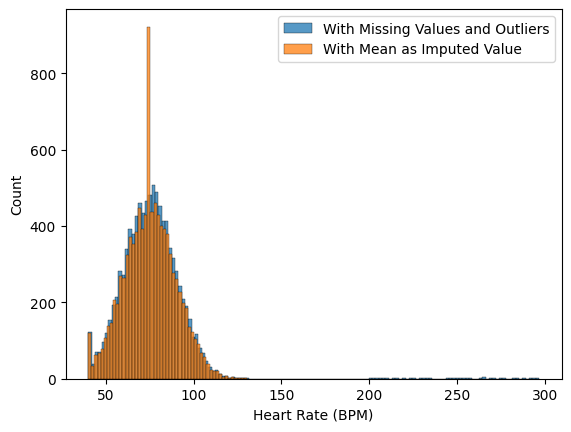

In [12]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: 
The median is decreased by only 0.0879 bpm. 

In [13]:
## coding cell to check the difference in median values 
medianSmartWatchHeartRate = smartwatch['Heart Rate (BPM)'].median()
medianSmartWatchHRHeartRate = smartwatch_hr['Heart Rate (BPM)'].median()

diffMedianhr = medianSmartWatchHeartRate-medianSmartWatchHRHeartRate

print(diffMedianhr)

0.08791720955503024


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [14]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [15]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

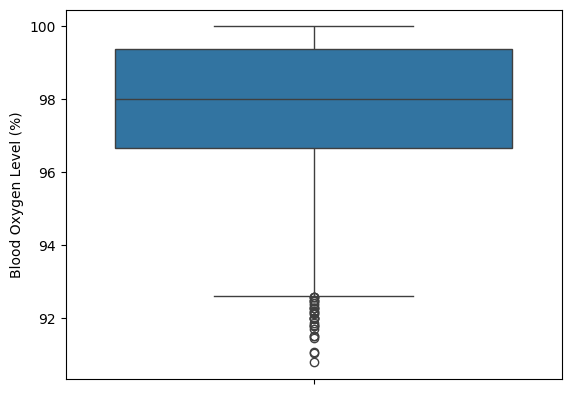

In [16]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)']) 

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: I chose to impute both the outlier and null values using the mean. This is becauase in the boxplot it is clear that there are outliers for minimum values. So for this reason, I looked up what is an abnormal blood oxygen level and found it to be 92% so I have created a group for blood oxygen levels below 92% and also one for null values. And chose them to be equal to the mean because that'd create a centralized zone. 

In [17]:
## use this space or additional cells to deal with the missing/outlier values. 

nullOxLvl = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]
outlierOxLvl = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 92] 

nullOxLvl['Blood Oxygen Level (%)'] = float(meanBloodO2)
outlierOxLvl['Blood Oxygen Level (%)'] = float(meanBloodO2)

oxLvlRws = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch['Blood Oxygen Level (%)'] >= 92)]

smartwatch_o2 = pd.concat([outlierOxLvl, nullOxLvl, oxLvlRws])

smartwatch_o2

/tmp/ipykernel_1692/1821660670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullOxLvl['Blood Oxygen Level (%)'] = float(meanBloodO2)
/tmp/ipykernel_1692/1821660670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierOxLvl['Blood Oxygen Level (%)'] = float(meanBloodO2)
/tmp/ipykernel_1692/1821660670.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  oxLvlRws = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & (smartwatch['Blood Oxygen Level (%)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
944,3703.0,84.058395,97.841581,9390.095074,4.550439370733248,Active,4
1179,3692.0,89.396977,97.841581,2790.919612,5.617238886873169,Sedentary,8
2316,2265.0,102.533707,97.841581,1015.818664,6.769490710476727,Actve,1
2698,3113.0,78.345556,97.841581,15758.278107,5.6881784100824815,Highly Active,1
4323,4789.0,55.749120,97.841581,1539.251521,5.5149299679046875,Seddentary,5
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [18]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

minSteps, maxSteps, meanSteps

(np.float64(0.9101380609604088),
 np.float64(62486.690753464914),
 np.float64(6985.685884992229))

In [19]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 
I visualized the data and found that there were outlier values, so I imputed the outlier and null values using the mean. This is to make sure that the outlier values don't influence the analysis.

In [20]:
## use this space or additional cells to address the missing or outlier data. 
#sns.boxplot(smartwatch['Step Count'])

outlierSC = smartwatch_o2[smartwatch_o2['Step Count'] > 21000]
nullSC = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]

nullSC['Step Count'] = meanSteps
outlierSC['Step Count'] = meanSteps

stepCounts = smartwatch_o2[(~smartwatch_o2['Step Count'].isnull()) & (smartwatch_o2['Step Count'] <= 21000)]

smartwatch_steps = pd.concat([outlierSC, nullSC, stepCounts])

smartwatch_steps

/tmp/ipykernel_1692/3470085421.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSC['Step Count'] = meanSteps
/tmp/ipykernel_1692/3470085421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSC['Step Count'] = meanSteps


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8369,2283.0,75.132684,97.841581,6985.685885,5.291653956497481,Highly_Active,2
644,3744.0,52.578793,97.841581,6985.685885,4.497472763173107,Sedentary,7
1260,3072.0,95.873161,97.841581,6985.685885,6.175934332407844,Sedentary,2
1779,2555.0,46.441672,97.841581,6985.685885,7.969197935150531,Active,8
1850,1730.0,93.219529,97.841581,6985.685885,5.442775017379499,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428634630125767,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [21]:
minSleep = smartwatch['Sleep Duration (hours)'].min()
minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [ ]:
for item in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(item)  ## first try to see if it can be converted to a number
    except:
        print(item)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [ ]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,6985.685885,ERROR,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,ERROR,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,ERROR,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,ERROR,Sedentary,3
7216,1498.0,112.891244,97.376654,6985.685885,ERROR,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,ERROR,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [ ]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_1952/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2989,3636.0,67.155900,97.957427,6985.685885,NaN,Actve,3
4651,3070.0,93.153315,97.629232,6985.685885,NaN,Highly Active,4
4732,3172.0,44.564677,93.509192,6985.685885,NaN,Seddentary,3
4981,1187.0,80.978300,94.933598,6985.685885,NaN,Sedentary,3
7216,1498.0,112.891244,97.376654,6985.685885,NaN,Seddentary,10
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,NaN,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [ ]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8369,2283.0,75.132684,97.841581,6985.685885,5.291654,Highly_Active,2
644,3744.0,52.578793,97.841581,6985.685885,4.497473,Sedentary,7
1260,3072.0,95.873161,97.841581,6985.685885,6.175934,Sedentary,2
1779,2555.0,46.441672,97.841581,6985.685885,7.969198,Active,8
1850,1730.0,93.219529,97.841581,6985.685885,5.442775,Actve,8
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [ ]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406444))

In [ ]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: 
I once again visualized the sleep duration as a box plot. Based on that, I found that this row also has outliers on both sides. For this reason, the outliers variable that I created was made using a comparison to capture the wide range of outliers. I also separated the null values. Then I set all of these values to be equal to the mean so they are centralized and combined all the categories back into the table.

In [ ]:
## use this space or additional cells to address the missing or outlier data. 
#sns.boxplot(smartwatch_sleep['Sleep Duration (hours)'])

nullSleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
outlierSleep = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] < 3) | 
                                (smartwatch_sleep['Sleep Duration (hours)'] > 11)]

nullSleep['Sleep Duration (hours)'] = meanSleep
outlierSleep['Sleep Duration (hours)'] = meanSleep

sleepDuration = smartwatch_sleep[(~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & 
                                 (3 <= smartwatch_sleep['Sleep Duration (hours)']) 
                                 & (smartwatch_sleep['Sleep Duration (hours)'] <= 11)]

smartwatch_updated_sleep = pd.concat([outlierSleep, nullSleep, sleepDuration])
smartwatch_updated_sleep

/tmp/ipykernel_1952/887351378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleep['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_1952/887351378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierSleep['Sleep Duration (hours)'] = meanSleep


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1823,3657.0,75.406171,99.391023,6985.685885,6.505463,Sedentary,1
8159,3658.0,70.514648,99.392796,6985.685885,6.505463,NaN,4
8168,1128.0,93.444436,97.336429,6985.685885,6.505463,Highly_Active,7
2733,3003.0,53.224481,95.692628,6985.685885,6.505463,Active,8
252,1709.0,77.099211,97.841581,3465.970911,6.505463,Highly Active,9
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [ ]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: 
I plan of assigning the highest value in the data set to "Very High." This is because reassigning "Very High" to the mean will not work like it did previously, because that is not corrent as that isn't the highest value.

In [ ]:
## Asked Chatgpt for help in reassigning a numeric to a string in pandas python - https://chatgpt.com/ 
smartwatch_updated_sleep.loc[smartwatch_updated_sleep['Stress Level'] == 'Very High', 'Stress Level'] = 10
smartwatch_stress = smartwatch_updated_sleep

Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [ ]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [ ]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'High Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]  ## Pull out rows for two unique values matching highly active
active['Activity Level'] = 'Active'  ## Reset the text in the column to either 'Highly Active'
active['NumActivity'] = 2 ## set the number for the numerical value 

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]  ## Pull out rows for two unique values matching highly active
sedentary['Activity Level'] = 'Sedentary'  ## Reset the text in the column to either 'Highly Active'
sedentary['NumActivity'] = 3 ## set the number for the numerical value 

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_1952/3455485053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'High Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_1952/3455485053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_1952/3455485053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
8168,1128.0,93.444436,97.336429,6985.685885,6.505463,High Active,7,1.0
252,1709.0,77.099211,97.841581,3465.970911,6.505463,High Active,9,1.0
8030,1526.0,75.132684,97.975944,1139.587295,6.505463,High Active,4,1.0
443,3485.0,55.435024,96.592926,17067.740781,6.505463,High Active,3,1.0
524,1537.0,54.636646,97.012952,37.238522,6.505463,High Active,2,1.0
...,...,...,...,...,...,...,...,...
9842,2108.0,71.152455,98.585987,1480.777008,8.379498,NaN,9,NaN
9845,4203.0,91.417098,95.383875,1238.788704,6.226965,NaN,7,NaN
9867,2674.0,69.075313,99.067026,2759.328767,4.919706,NaN,5,NaN
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [ ]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level              200
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 8168 to 9991
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
 7   NumActivity             9800 non-null   float64
dtypes: float64(6), object(2)
memory usage: 703.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:
When visualizing the graph without using the size parameter, I found that there appears to be no correlation between the two variables. There is no solid pattern – the data points are scattered all over. When involving the size parameter, no pattern was still mapped but the smaller sizes, 0.1 and 0.5, made it easier to see entire data together.
...

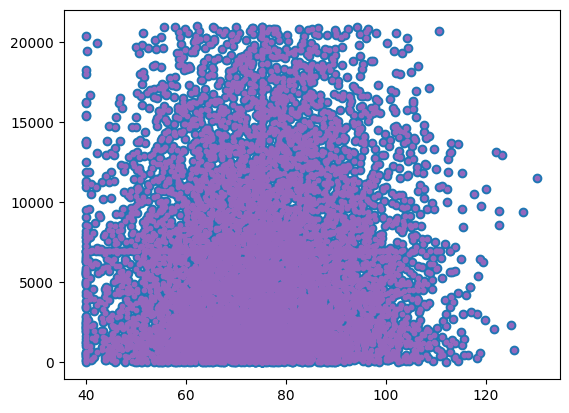

In [ ]:
#Comparing Heart Rate (BPM) and Step Count

plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'])
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=.1)
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=.5)
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=1)
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=10)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:
There appears to be a very slight poitive relationship between the two variables, heart rate (bpm) and step count. The null and outlier values appear to skew the data if not addressed appropriately.
...

In [ ]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

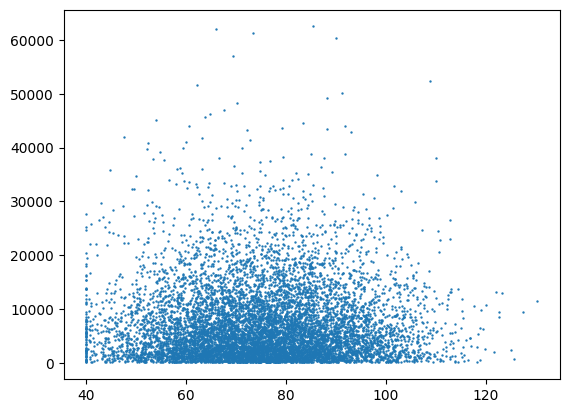

In [ ]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Step Count'], s = .5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: ylabel='Step Count'>

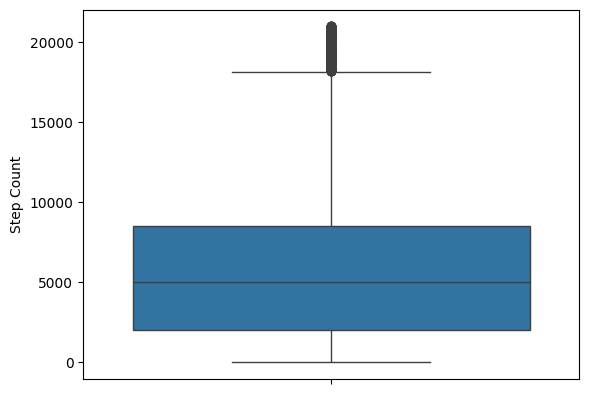

In [ ]:
## Visualization 
sns.boxplot(final_table['Step Count'])

In [ ]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['NumActivity'] == 3]  ## sedentary rows
act = final_table[final_table['NumActivity'] == 2] ## active rows
hact = final_table[final_table['NumActivity'] == 1] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])

print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 1.166, p-value: 0.312


Is there significant difference between the groups' step counts?  

ANSWER:
There doesn't appear to be a significant difference between groups' step counts based on the p-value. A p-value of 0.312 is much greater than the threshold of p = 0.05 or less, and for this reason shows little statistical significance. Indicating that the difference in step counts is not based on the difference in activity levels. 

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:
When data has outliers or null values, these values impact the distribution and central statistics of the dataset. For this reason, one must use methods like imputation to decrease the impact of these data groups. Although it is still very important to look into outliers and ensure that they are being addressed. For example, if the blood oxygen levels are below normal – less than 92%, it can be dangerous. Therefore, if such values show up in the data, users should dig deeper into why they are showing up. Once that is done, and if it is realized that they are miscalculations or something of that sort, one can use imputation to reassign those data points to a different value. In quite a few cases I reassigned the null and outlier values to the mean. This way the center of the dataset is undisturbed, although the median often changes. This change in the median is though quite small – take the example of the difference in imputed median versus original median of the heart rate (bpm) count. It was less than a 0.1 bpm difference, which is quite small. Thus, using the mean, or a statistic that is appropriate for the specific issue for imputation is useful in cleaning up the data. 